# WSI LAB02 Algorytm genetyczny

### Miłosz Cieśla 325154 <br>

## Cel eksperymentu 
- Przetestowanie działania algorytmu genetycznego na zadanej funkcji(symulacja lądowania rakiety)
- Znalezienie optymalnych i działających parametrów dla niej.
- Zbadanie wpływu parametru odpowiedzialnego za mutację

## Przykładowe wywołania dla danego problemu:
Dla dokładnego zbadania wpływu, każdy przypadek został uruchomiony 25 razy, na wykresach przedstawiam średnie wartości ze wszystkich przebiegów.

Potrzebne importy:

In [3]:
from measurements import getSolverHistories, plotHistories

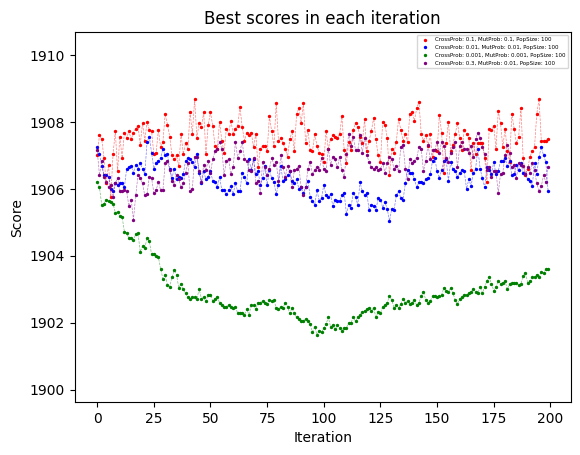

In [23]:
paramsArray = [[0.1, 0.1, 100], [0.01, 0.01, 100], [0.001, 0.001, 100], [0.3, 0.01, 100]]
colorsArray = ["red", "blue", "green", "purple"]
BSHistories, avgHistories, bestScores = getSolverHistories(paramsArray, 200)
plotHistories(BSHistories, paramsArray, colorsArray, "Best scores in each iteration", 1, True)

### Średnie wartości:

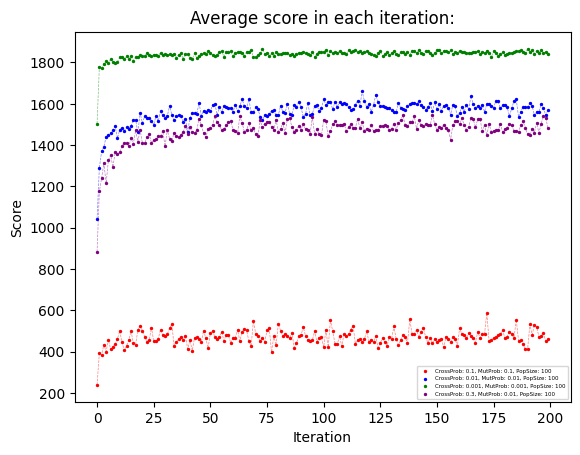

In [21]:
plotHistories(avgHistories, paramsArray, colorsArray, "Average score in each iteration:", 0, True)

Jak możemy zauważyć przykładem parametrów dających dobry wynik jest: <br>
Prawdopodobieństwo krzyżowania: 0.01 <br>
Prawdopodobieństwo mutacji: 0.01 <br>
Wielkość populacji: 100 <br>

## Badanie wpływu parametru prawdopodobieństwa mutacji na wyniki

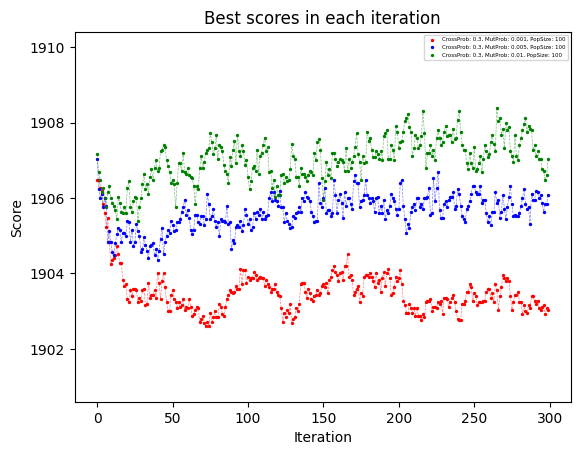

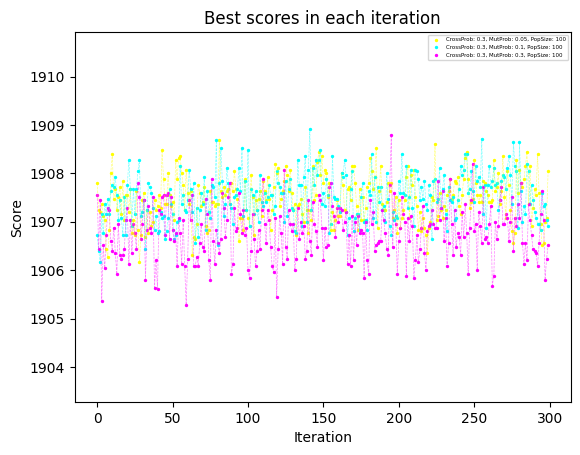

In [12]:
paramsArray = [[0.3, 0.001, 100], [0.3, 0.005, 100], [0.3, 0.01, 100], [0.3, 0.05, 100], [0.3, 0.1, 100], [0.3, 0.3, 100]]
colorsArray = ["red", "blue", 'green', 'yellow', 'cyan', 'magenta']
BSHistories, avgHistories, bestScores = getSolverHistories(paramsArray, 300)
plotHistories(BSHistories[:3], paramsArray[:3], colorsArray, "Best scores in each iteration", 1, True)
plotHistories(BSHistories[3:], paramsArray[3:], colorsArray[3:], "Best scores in each iteration", 1, True)

### Średnie wartości:

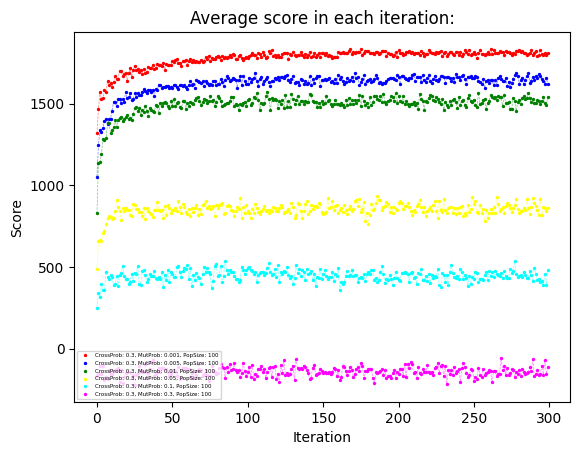

In [13]:
plotHistories(avgHistories, paramsArray, colorsArray, "Average score in each iteration:", 0, True)

### Średnie wyniki:



In [14]:
print("Parametry: [crossProb, mutProb, popSize] Wynik: BestScore")
for i, bestScore in enumerate(bestScores):
    print("Parametry: ", paramsArray[i], "\t\t Wynik: ", bestScore)

Parametry: [crossProb, mutProb, popSize] Wynik: BestScore
Parametry:  [0.3, 0.001, 100] 		 Wynik:  1909.48
Parametry:  [0.3, 0.005, 100] 		 Wynik:  1912.24
Parametry:  [0.3, 0.01, 100] 		 Wynik:  1914.76
Parametry:  [0.3, 0.05, 100] 		 Wynik:  1915.88
Parametry:  [0.3, 0.1, 100] 		 Wynik:  1915.88
Parametry:  [0.3, 0.3, 100] 		 Wynik:  1916.2


Jak możemy zauważyć niskie prawdopodobieństwo mutacji prowadzi do wzrostu ocen całej populacji, lecz w zadanej liczbie iteracji nie jest w stanie znaleźć najbardziej optymalnego osobnika,
natomiast wysokie prawdopodobieństwo przez dużą losowość na każdym bitcie sprawia, że wyniki populacji nie rosną jako całość ale daje nam sporą szanse, że wylosuje się jeden osobnik który znajdzie najlepszy wynik.
<br> <br>

# Wnioski z eksperymentów oraz podsumowanie:

Algorytm genetyczny z selekcją ruletkową, krzyżowaniem jednopunktowym oraz sukcesją genetyczną jest dobrym sposobem na dokładne znalezienie najlepszego rozwiązania. Może być mu potrzebna duża liczba iteracji, lecz uda mu się osiągnąć zamierzony cel.
### Wpływ mutacji na wyniki:
Mutacja wprowadza główny element losowości do algorytmu. Odpowiada za rozpiętość sprawdzanych przedziałów wartości(możemy to zaobserwować na wykresie).
Przy dużej mutacji jesteśmy w stanie bardzo szybko uzyskać bardzo dobre wyniki. Musimy jednak uważać aby nie przesadzić z tym prawdopodobieństwem ponieważ nasze wyniki stają się wtedy kompletnie losowe. Przy jej niskich wartościach możemy zauważyć sytuacje stopniowego wzrostu wartości populacji lecz ciężko jest jej wybić się poza wartości do których doszła. 


<br> <br> <br>
## DODATKOWE:

### Przykład wywołania z dużą liczbą iteracji i niskim parametrem mutacji

In [15]:
from geneticAlgorithm import gaSolver
from rocketLanding import rocketLanding
solver = gaSolver(10000, 0.3, 0.1)
print(solver.solve(rocketLanding, solver.populationInit()))

('11010001010101001110101000111100001001110000011001010010100110010011001001100000010010111111100001011111100111000011100011010010101010011101000001011011000101000000010001000100011000000000000000001000', 1920)
